## Preparation

Imported necessary packages

In [211]:
using ForwardDiff
using Plots

Defined Rosenbrock function

In [173]:
rosenbrock(x) = sum([100*(x[i+1]-x[i]^2)^2 + (1-x[i])^2 for i in 1:(length(x)-1)])

rosenbrock (generic function with 2 methods)

Defined util functions for logging the results of optimizations

In [232]:
function log(x, y, last::Bool=false)
    n = length(x)
    for i in (last ? n : 1):n
        println("function value in iteration $i for x=$(x[i]) is $(y[i])")
    end
end

log (generic function with 5 methods)

In [233]:
log(xy::Tuple, last::Bool=false) = log(xy[1], xy[2], last)

log (generic function with 5 methods)

## Gradient Descent

In [175]:
rosenbrock_gradient(x) = ForwardDiff.gradient(rosenbrock, x)

rosenbrock_gradient (generic function with 1 method)

In [176]:
function rosenbrock_gradient_descent(x, learningRate, iteration)
    arguments = []
    values = zeros(iteration)
    
    for i in 1:iteration
        gradient = rosenbrock_gradient(x)
        x -= (learningRate * gradient)
        
        push!(arguments, x)
        values[i] = rosenbrock(x)
    end
    return (arguments, values)
end

rosenbrock_gradient_descent (generic function with 3 methods)

In [215]:
log(rosenbrock_gradient_descent(zeros(2), 1, 5, true, false))

function value in iteration 1 for x=[2.0, 0.0] is 1601.0
function value in iteration 2 for x=[-3200.0, 800.0] is 1.04841216742464e16
function value in iteration 3 for x=[1.3106176003202e13, 2.0478408e9] is 2.950556825554033e54
function value in iteration 4 for x=[-9.005088363938272e41, 3.4354369885381586e28] is 6.575850257231013e169
function value in iteration 5 for x=[2.920948686551318e128, 1.6218323288467292e86] is Inf


In [234]:
arguments, values = rosenbrock_gradient_descent(zeros(2), 0.001953125, 10000, false, true)
log(arguments, values, true)

function value in iteration 10000 for x=[0.9998769508199485, 0.9997534243511839] is 1.5165349423500852e-8


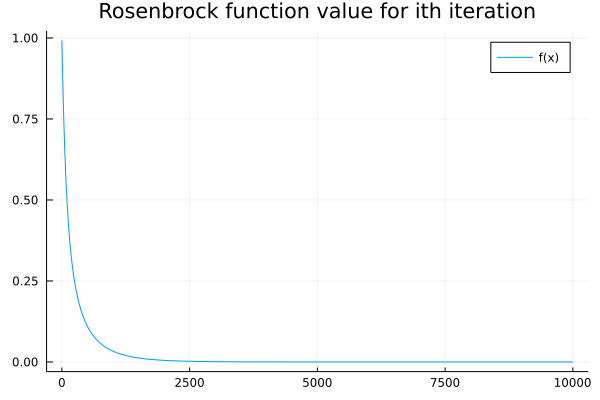

In [221]:
iterations = 1:10000
plot(iterations, values, title="Rosenbrock function value for ith iteration", label="f(x)")

## Newton

In [102]:
rosenbrock_hessian(x) = ForwardDiff.hessian(rosenbrock, x)

rosenbrock_hessian (generic function with 1 method)

In [204]:
function rosenbrock_newton(x, iteration)
    arguments = []
    values = zeros(iteration)
    
    for i in 1:iteration
        hessian = rosenbrock_hessian(x)
        hessian_inverted = inv(hessian)
        gradient = rosenbrock_gradient(x)
        x -= hessian_inverted * gradient
        
        push!(arguments, x)
        values[i] = rosenbrock(x)
    end
    return (arguments, values)
end
    

rosenbrock_newton (generic function with 3 methods)

In [205]:
log(rosenbrock_newton(zeros(2), 5))

function value in iteration 1 for x=[1.0, 0.0] is 100.0
function value in iteration 2 for x=[1.0, 1.0000000000000002] is 4.930380657631324e-30
function value in iteration 3 for x=[1.0, 1.0] is 0.0
function value in iteration 4 for x=[1.0, 1.0] is 0.0
function value in iteration 5 for x=[1.0, 1.0] is 0.0


## 4-dimension functions

In [206]:
log(rosenbrock_gradient_descent(zeros(4), 1, 5))

function value in iteration 1 for x=[2.0, 2.0, 2.0, 0.0] is 2403.0
function value in iteration 2 for x=[-1600.0, -1200.0, -2800.0, 800.0] is 7.009447403851203e15
function value in iteration 3 for x=[1.639168001602e12, 6.93056241202e11, 8.780192562802e12, 1.5678408e9] is 5.950592759290638e53
function value in iteration 4 for x=[-1.7616936705912477e39, -1.3315743716473421e38, -2.7075227442064908e41, 1.5418356287976711e28] is 5.373886071432001e167
function value in iteration 5 for x=[2.187012037085861e120, 9.444006446884544e116, 7.93919249365276e126, 1.4661358820790892e85] is Inf


In [226]:
arguments, values = rosenbrock_gradient_descent(zeros(4), 0.001, 10000)
log(arguments, values, true)

function value in iteration 10000 for x=[0.9993484327853309, 0.998694837896222, 0.9973852357268781, 0.9947643652581047] is 8.98610837907298e-6


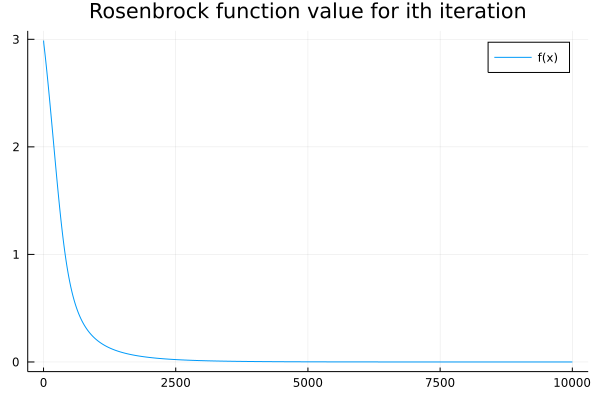

In [228]:
iterations = 1:10000
plot(iterations, values, title="Rosenbrock function value for ith iteration", label="f(x)")

In [236]:
arguments, values = rosenbrock_newton(zeros(4), 10)
log(arguments, values)

function value in iteration 1 for x=[1.0, 0.009900990099009901, 0.009900990099009901, 0.0] is 99.99980780393109
function value in iteration 2 for x=[1.0202867732022258, 1.0607608943320725, 0.030597107876195823, 0.0005078537193404132] is 120.80151484911426
function value in iteration 3 for x=[1.0288610235110744, 1.0584567326401078, 1.1182115163297608, 0.06749189377670485] is 139.9451220611841
function value in iteration 4 for x=[1.0280385143594528, 1.056998691891617, 1.1175747735669672, 1.2489729690719125] is 0.017871466499295018
function value in iteration 5 for x=[1.0005990050053013, 1.000451972261793, 0.9977294202793465, 0.9811010873863264] is 0.021698634165387847
function value in iteration 6 for x=[0.9996386561754077, 0.9992739986408141, 0.9985385098788581, 0.9970785010851106] is 2.804858849311615e-6
function value in iteration 7 for x=[0.9999999738353593, 0.9999998182343263, 0.9999991165765356, 0.9999960997819264] is 4.846459002959086e-10
function value in iteration 8 for x=[0.999

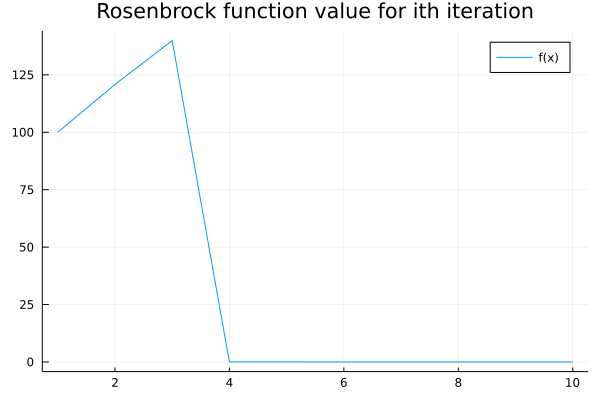

In [237]:
iterations = 1:10
plot(iterations, values, title="Rosenbrock function value for ith iteration", label="f(x)")